# **LIBRARIES**

In [ ]:
#importing the required libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
import csv
import os
from IPython.display import HTML as html_print
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
%matplotlib inline


## **DATASET**

In [ ]:
df = pd.read_csv('ds_salaries.csv') #readind dataset
print("Size of the dataset", df.shape) #dataset content
df.head()

Size of the dataset (607, 12)


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# **DATA** **CLEANING**

In [ ]:
df.columns
df.info()
df.isnull().sum() #checking possible null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
#deleting unwanted columns
del df['Unnamed: 0']
del df['salary']
del df['salary_currency']



In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [ ]:
print("Unique values of work year column: \n",df.work_year.unique())

Unique values of work year column: 
 [2020 2021 2022]


In [ ]:
print("Unique values of company location column: \n",df.company_location.unique())

Unique values of company location column: 
 ['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'CN' 'GR' 'AE' 'NL'
 'MX' 'CA' 'AT' 'NG' 'ES' 'PT' 'DK' 'IT' 'HR' 'LU' 'PL' 'SG' 'RO' 'IQ'
 'BR' 'BE' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'CO' 'MD' 'KE' 'SI' 'CH' 'VN'
 'AS' 'TR' 'CZ' 'DZ' 'EE' 'MY' 'AU' 'IE']


In [ ]:
print("Unique values of experience level column: \n",df.experience_level.unique())

Unique values of experience level column: 
 ['MI' 'SE' 'EN' 'EX']


In [ ]:
print("Unique values of job title column: \n",df.job_title.unique())

Unique values of job title column: 
 ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Analytics Manager' 'Head of Data Science' 'Data Specialist'

In [ ]:
print("Unique values of salary currency column: \n",df.salary_in_usd.unique())

Unique values of salary currency column: 
 [ 79833 260000 109024  20000 150000  72000 190000  35735 135000 125000
  51321  40481  39916  87000  85000   8000  41689 114047   5707  56000
  43331   6072  47899  98000 115000 325000  42000  33511 100000 117104
  59303  70000  68428 450000  46759  74130 103000 250000  10000 138000
  45760  50180 106000 112872  15966  76958 188000 105000  70139  91000
  45896  54742  60000 148261  38776 118000 120000 138350 110000 130800
  21669 412000  45618  62726  49268 190200  91237  42197  82528 235000
  53192   5409 270000  80000  79197 140000  54238  47282 153667  28476
  59102 170000  88654  76833  19609 276000  29751  89294  12000  95746
  75000  36259  62000  73000  51519 187442  30428  94564 113476 103160
  45391 225000  50000  40189  90000 200000 110037  10354 151000   9466
  40570  49646  38400  24000  63711  77364 220000 240000  82500  82744
  62649 153000 160000 168000  75774  13400 144000 127221 119059 423000
 230000  28369  63831 130026 16500

In [ ]:
print("Unique values of employment type column: \n",df.employment_type.unique())

Unique values of employment type column: 
 ['FT' 'CT' 'PT' 'FL']


In [ ]:
print("Unique values of employee residence column: \n",df.employee_residence.unique())

Unique values of employee residence column: 
 ['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'PL' 'PT' 'CN' 'GR'
 'AE' 'NL' 'MX' 'CA' 'AT' 'NG' 'PH' 'ES' 'DK' 'RU' 'IT' 'HR' 'BG' 'SG'
 'BR' 'IQ' 'VN' 'BE' 'UA' 'MT' 'CL' 'RO' 'IR' 'CO' 'MD' 'KE' 'SI' 'HK'
 'TR' 'RS' 'PR' 'LU' 'JE' 'CZ' 'AR' 'DZ' 'TN' 'MY' 'EE' 'AU' 'BO' 'IE'
 'CH']


In [ ]:
#converting country codes to country names
import country_converter as coco
country_names = coco.convert(df['employee_residence'], to="name_short")
df['employee_residence'] = country_names
country_names = coco.convert(df['company_location'], to="name_short")
df['company_location'] = country_names

In [ ]:
#replacing abbrevations
df['experience_level'] = df['experience_level'].replace('EN','Junior')
df['experience_level'] = df['experience_level'].replace('MI','Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Expert')
df['experience_level'] = df['experience_level'].replace('EX','Director')

df['employment_type'] = df['employment_type'].replace('FT','Full-Time')
df['employment_type'] = df['employment_type'].replace('CT','Contract')
df['employment_type'] = df['employment_type'].replace('PT','Part-Time')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')

df['company_size'] = df['company_size'].replace('L','Large')
df['company_size'] = df['company_size'].replace('S','Small')
df['company_size'] = df['company_size'].replace('M','Medium-sized')


## **data** **visualization** **** 




In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Intermediate,Full-Time,Data Scientist,79833,Germany,0,Germany,Large
1,2020,Expert,Full-Time,Machine Learning Scientist,260000,Japan,0,Japan,Small
2,2020,Expert,Full-Time,Big Data Engineer,109024,United Kingdom,50,United Kingdom,Medium-sized
3,2020,Intermediate,Full-Time,Product Data Analyst,20000,Honduras,0,Honduras,Small
4,2020,Expert,Full-Time,Machine Learning Engineer,150000,United States,50,United States,Large


Designation and their  salaries

conclusion-Data analytics lead is the highest paid designation

In [ ]:
avg_sal_loc = df.groupby("company_location")['salary_in_usd'].agg('mean').reset_index()
fig = px.bar(avg_sal_loc, x="company_location", y="salary_in_usd", color='company_location', title="Average Salary by Location")
fig.update_traces(textfont_size=10, textangle=45, textposition="outside", cliponaxis=False)
fig.show()

Conclusion-Russia,United states and new zealand are the top paying countries

In [ ]:
job_salaries = df.groupby(['work_year', 'job_title'], as_index=False).agg(mean=('salary_in_usd', 'mean'))
top3_job_salaries= job_salaries[job_salaries['job_title'].isin(["Data Scientist", "Data Engineer", "Data Analyst","Machine Learning Engineer","Research Scientist"])]
top3_job_salaries

fig = px.line(top3_job_salaries, x="work_year", y="mean", color='job_title', markers=True)
fig.update_xaxes(type="category")
fig.update_traces(marker_size=10)
fig.update_layout(margin=dict(t=70, b=90, l=90, r=40),
                        coloraxis_showscale=False,
                        title_text='Top 5 job title Salaries',
                        hovermode="x unified",
                        xaxis_tickangle=360,
                        xaxis_title=' ', yaxis_title=" ",
                        plot_bgcolor='lavender', paper_bgcolor='lavender',
                        title_font=dict(size=25, color='black', family="Lato, sans-serif"),
                        font=dict(color='black'),
                        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                          )
fig.show()

In [ ]:
top_job_title = df['job_title'].value_counts()[:10]
fig = go.Figure(data=[go.Pie(labels=top_job_title.keys(), values=top_job_title.values, pull=[0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0])])
fig.update_traces(textposition='inside', textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Top Job Titles', title_font=dict(size=25, color='black', family="Lato, sans-serif"),paper_bgcolor="#C1C1FF", title_font_color="black",)
fig.show()


In [ ]:
fig = px.histogram(df, x='experience_level', template='plotly_white', title='Distribution of Experience Level', text_auto=True)
fig.update_layout(
    xaxis_title="Experience Level",
    yaxis_title="Count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

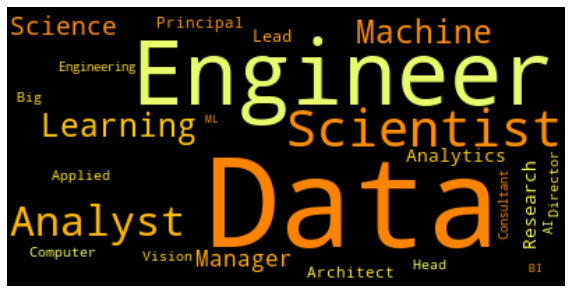

In [ ]:
from wordcloud import WordCloud
text = " ".join(job_titles for job_titles in df["job_title"])
word_cloud = WordCloud(collocations = False, background_color = 'black', colormap = 'Wistia', min_font_size = 8).generate(text)
plt.figure(figsize = (10, 8))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

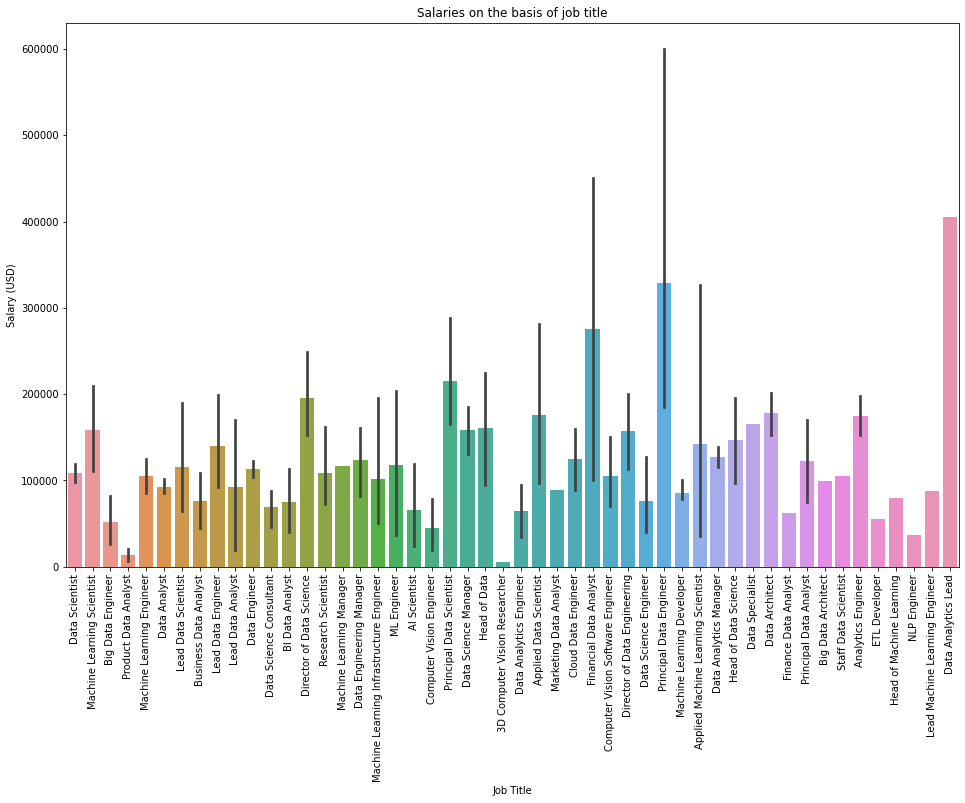

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(x = df['job_title'], y = df['salary_in_usd'])
plt.title("Salaries on the basis of job title")
plt.xlabel("Job Title")
plt.xticks(rotation = 90)
plt.ylabel("Salary (USD)")
plt.show()

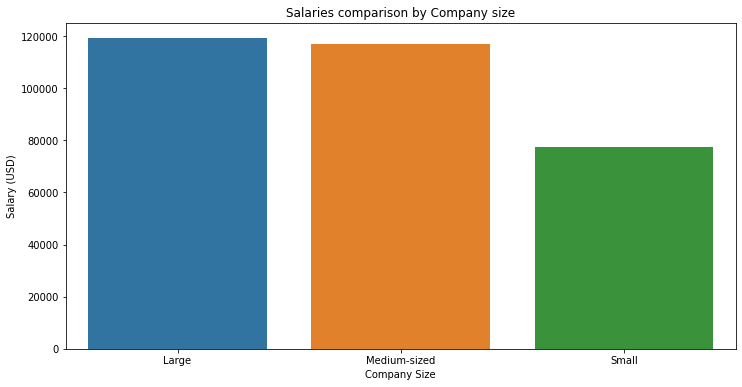

In [ ]:
comp_size_sal = df.groupby('company_size')['salary_in_usd'].mean().reset_index()
comp_size_sal = pd.DataFrame(comp_size_sal)
comp_size_sal.head()

plt.figure(figsize=(12,6))
sns.barplot(x = comp_size_sal['company_size'], y= comp_size_sal['salary_in_usd'])
plt.title("Salaries comparison by Company size")
plt.xlabel("Company Size")
plt.ylabel("Salary (USD)")
plt.show()

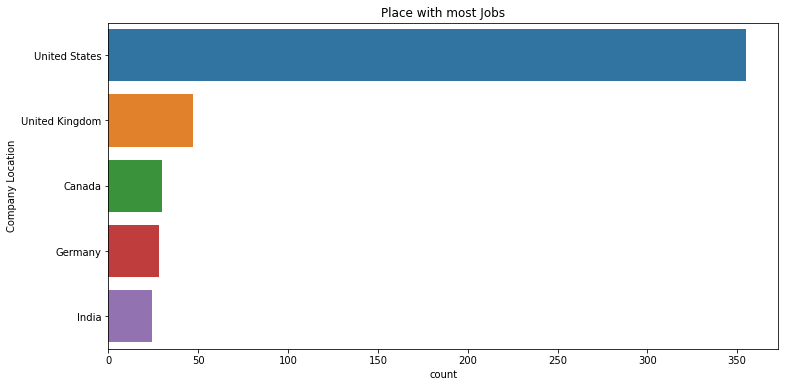

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y = df['company_location'], order=df['company_location'].value_counts().head().index)# title of the chart
plt.title("Place with most Jobs")
plt.ylabel("Company Location")
plt.show()

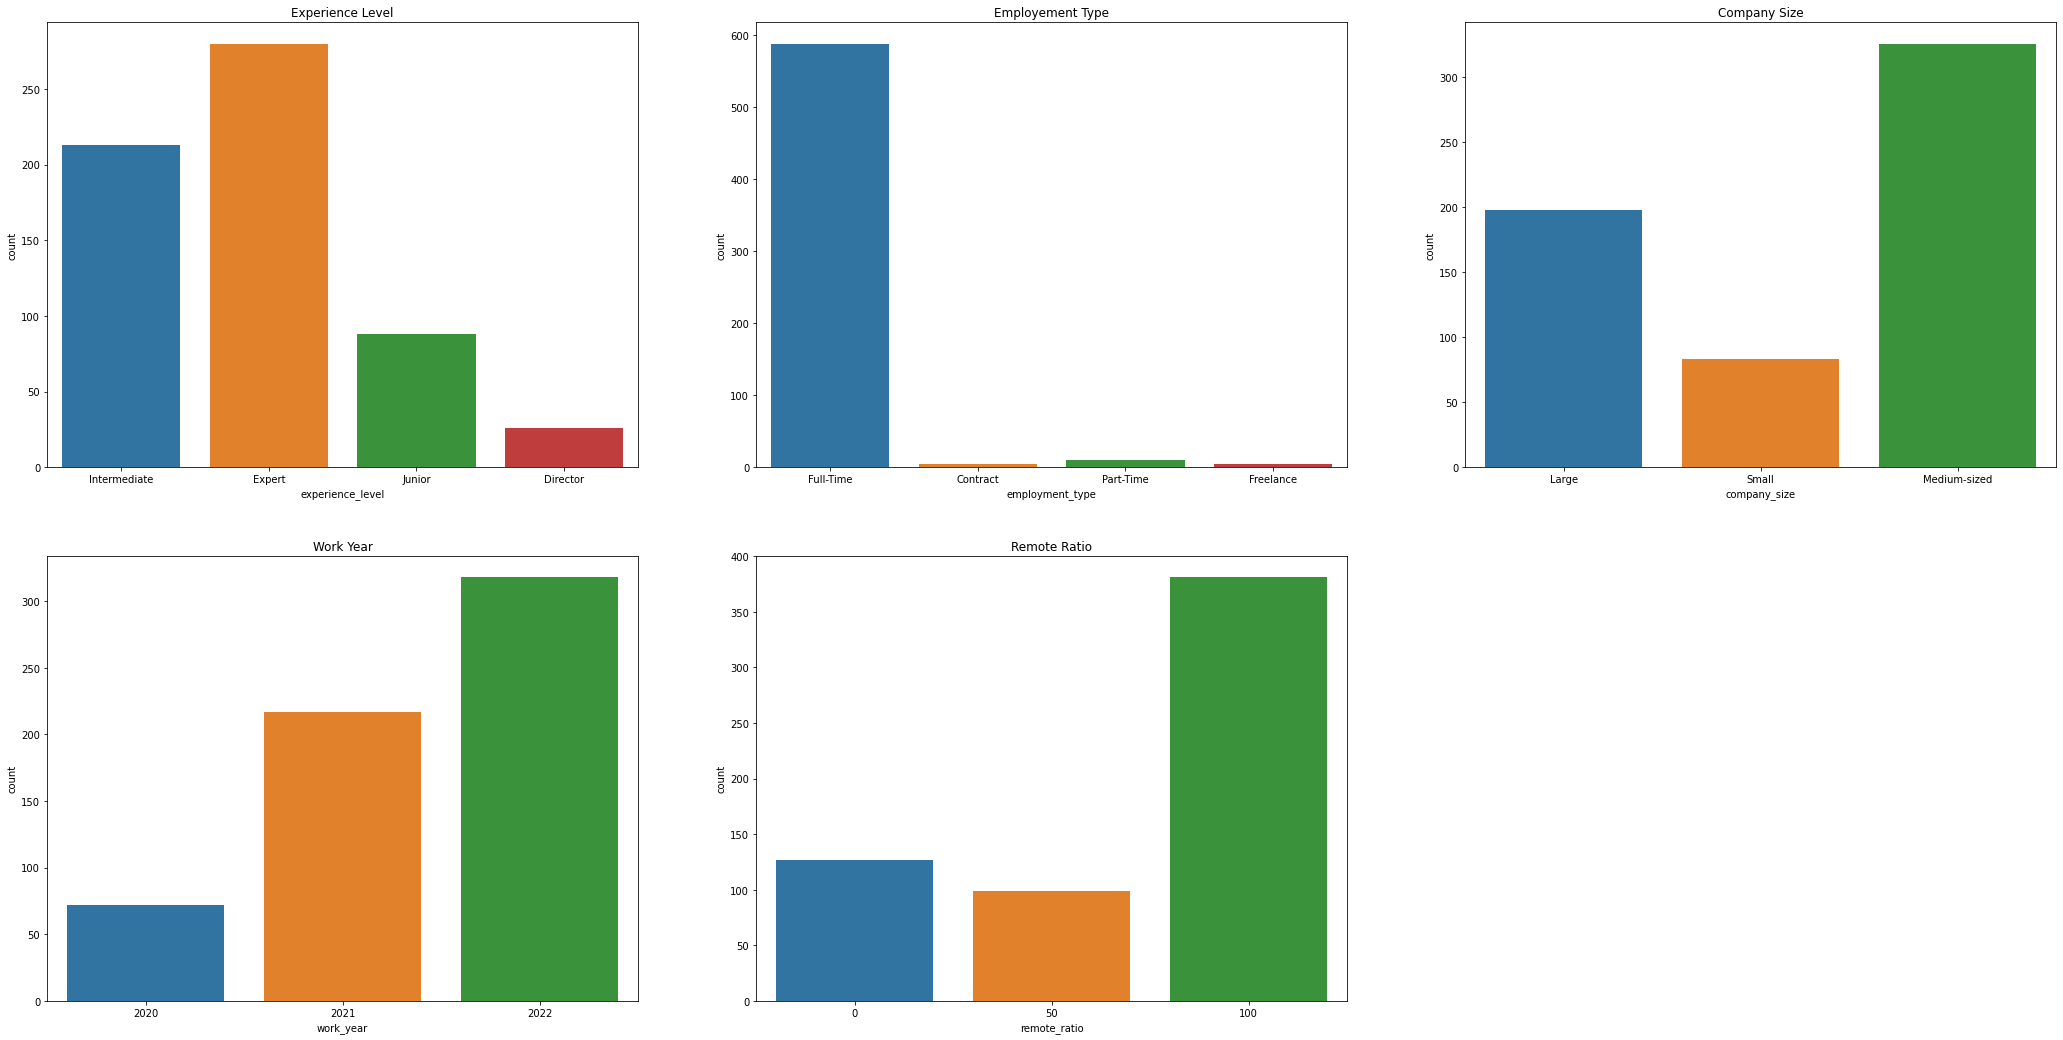

In [ ]:
plt.figure(figsize=(36,18))

plt.subplot(2, 3, 1)
sns.countplot(x=df["experience_level"], data=df)
plt.title("Experience Level")

plt.subplot(2, 3, 2)
sns.countplot(x=df["employment_type"], data=df)
plt.title("Employement Type")

plt.subplot(2, 3, 3)
sns.countplot(x=df["company_size"], data=df)
plt.title("Company Size")

plt.subplot(2, 3, 4)
sns.countplot(x=df["work_year"], data=df)
plt.title("Work Year")

plt.subplot(2, 3, 5)
sns.countplot(x=df["remote_ratio"], data=df)
plt.title("Remote Ratio")

plt.show()

In [ ]:
fig=px.pie(df.groupby('remote_ratio',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='remote_ratio',values='salary_in_usd',color='remote_ratio',hole=0.7,labels={'remote_ratio':'remote ratio','salary_in_usd':'count'},template='plotly',title='<b> Remote Ratio')
fig.update_layout(title_x=0.5)

In [ ]:
fig=px.treemap(df,path=[px.Constant('Job Roles'),'job_title','company_location','experience_level'],template='ggplot2',hover_name='job_title',title='<b>TreeMap of Different Data Science jobs with Experience Level')
fig.update_traces(root_color='lightgrey')